# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1059.
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           1.97e-42
Time:                        17:32:02   Log-Likelihood:                 2.6351
No. Observations:                  50   AIC:                             2.730
Df Residuals:                      46   BIC:                             10.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9293      0.082     60.429      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.42354896  4.86251583  5.27004587  5.62550004  5.91568785  6.13703444
  6.29616801  6.40883077  6.49729258  6.58669201  6.70090623  6.85862798
  7.07029447  7.33637252  7.6472819   7.98496933  8.32587456  8.64480129
  8.91905681  9.13218038  9.27664766  9.35510696  9.37994411  9.37124752
  9.35350769  9.35159351  9.38666637  9.47270339  9.61420104  9.80543634
 10.03140719 10.27029714 10.49705974 10.68753368 10.82241233 10.89041586
 10.89014441 10.8303081  10.72829602 10.60731921 10.49259717 10.40721435
 10.36832747 10.38434669 10.45355387 10.56438483 10.69732934 10.82813656
 10.93179942 10.9866632 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.96651755 10.84383137 10.633456   10.36923577 10.09572171  9.85726395
  9.68715319  9.59947005  9.58563759  9.61652127]


## Plot comparison

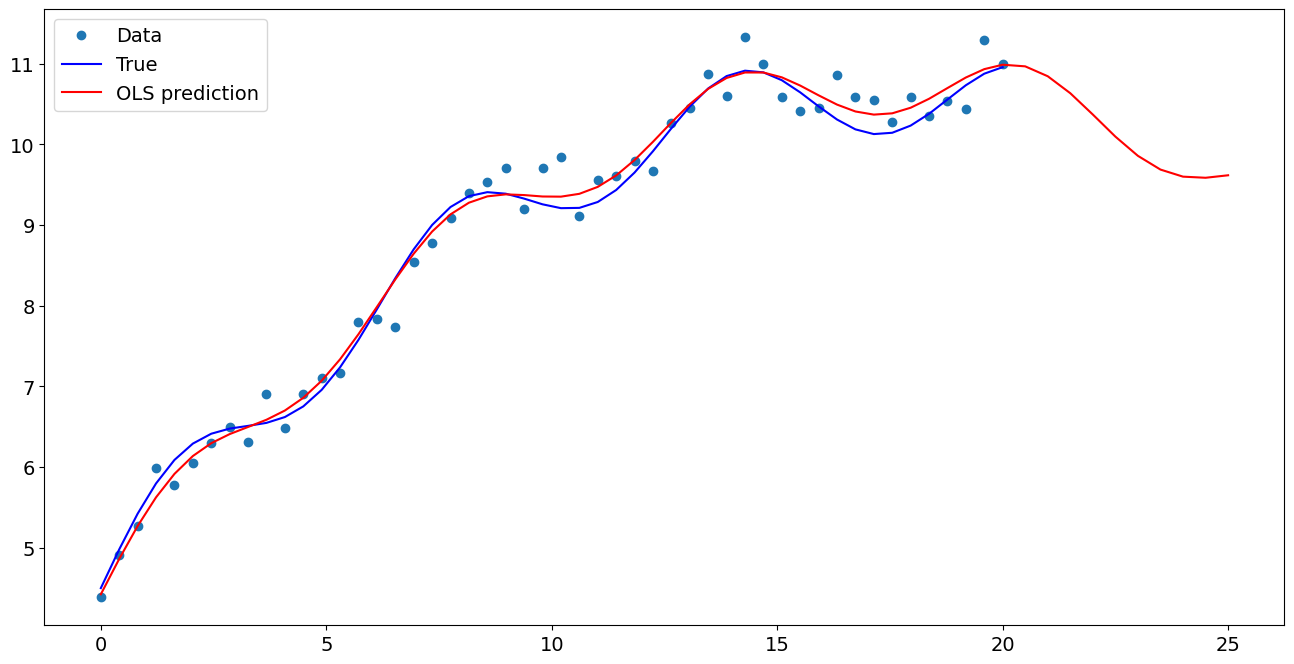

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.929275
x1                  0.513159
np.sin(x1)          0.378704
I((x1 - 5) ** 2)   -0.020229
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.966518
1    10.843831
2    10.633456
3    10.369236
4    10.095722
5     9.857264
6     9.687153
7     9.599470
8     9.585638
9     9.616521
dtype: float64